In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from shapely.geometry import Point, LineString, Polygon
from shapely.ops import nearest_points

In [2]:
fragment_name = "RPf_00368_intact_mesh.png"
directory_path = f"polygons/group_45/"

In [3]:

df_fragment_rdp = pd.read_csv(f"{directory_path}/{fragment_name}.csv")
print(df_fragment_rdp.columns)
df_fragment_rdp.head()

Index(['Unnamed: 0', 'image_name', 'simple_segment_id', 'segment_id',
       'start_point_x', 'start_point_y', 'end_point_x', 'end_point_y',
       'seg_number', 'seg_length', 'avg_color', 'avg_red', 'avg_green',
       'avg_blue', 'angle_left', 'angle_right', 'f_center_x', 'f_center_y'],
      dtype='object')


,Unnamed: 0,image_name,simple_segment_id,segment_id,start_point_x,start_point_y,end_point_x,end_point_y,seg_number,seg_length,avg_color,avg_red,avg_green,avg_blue,angle_left,angle_right,f_center_x,f_center_y
0,0,368,c0,9356aab4-c945-42ea-8aa6-3ebdb9c96e05,350,964,363,1029,0,71,88,8,248,8,0.391502,0.513312,1032,1033
1,1,368,c1,c2945d3d-83dd-4740-b5ac-718391258ce5,363,1029,431,1108,1,131,87,11,244,7,0.513312,0.149180,1032,1033
2,2,368,c2,8ba49f34-d594-4213-8d76-c8b14d520ed5,431,1108,467,1139,2,56,87,23,232,7,0.149180,0.942000,1032,1033
3,3,368,c3,434443c5-c1fc-4152-99d8-32a4760d9039,467,1139,484,1135,3,18,86,125,129,4,0.942000,1.061912,1032,1033
4,4,368,c4,75a73551-b2bd-4a00-9eb4-f9c374d274df,484,1135,526,1181,4,79,87,17,238,7,1.061912,0.491529,1032,1033


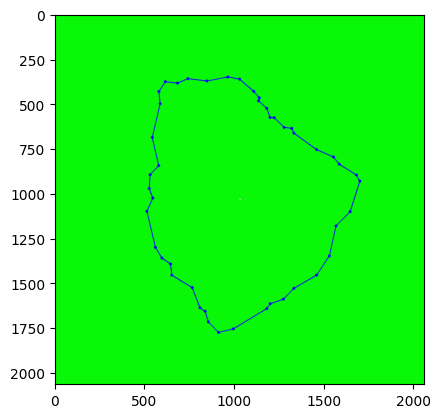

In [4]:
rdp_img = cv2.imread(f"{directory_path}/{fragment_name}",cv2.COLOR_BGR2RGB)
plt.imshow(rdp_img)


In [5]:
xs = df_fragment_rdp["start_point_x"].values.tolist()
ys = df_fragment_rdp["start_point_y"].values.tolist()

polygon = [(x,y) for x,y in zip(xs,ys)]

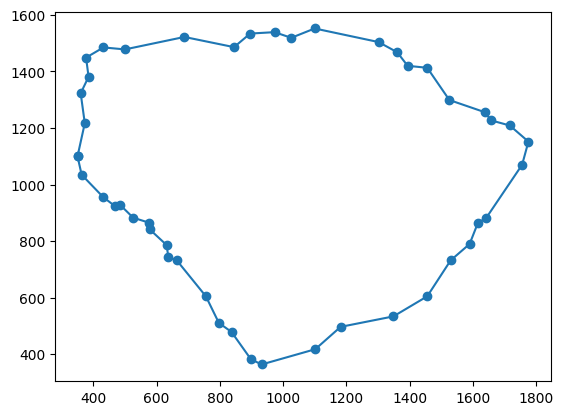

In [6]:
img_height = 2064
ys_opp = [img_height-y for y in ys]
plt.plot(xs+[xs[0]],ys_opp+[ys_opp[0]],"-o")

In [28]:
def find_intersection_and_closest_vertices(line_coords, poly_coords):
    # Create LineString object from line coordinates and extend it to be an infinite line
    line = LineString(line_coords).buffer(10000)

    # Create Polygon object from polygon coordinates
    poly = Polygon(poly_coords)

    # Check if the line intersects the polygon
    if not line.intersects(poly):
        return False, None, None

    # Compute the intersection point
    intersection = line.intersection(poly)
    
    # Find the closest points between the intersection and the polygon
    nearest_pts = nearest_points(intersection, poly)
    closest_vertex1 = nearest_pts[0]
    closest_vertex2 = nearest_pts[1]

    # Return intersection point and closest vertices as tuple
    return intersection, closest_vertex1, closest_vertex2


def plot_line_and_polygon(line_coords, poly_coords, closest_vertices):
    """
    Plots the line and polygon, along with the closest vertices on the polygon.

    Args:
        line_coords (list): List of 2D coordinates for the line.
        poly_coords (list): List of 2D coordinates for the polygon.
        closest_vertices (list): List of 2D coordinates for the closest vertices on the polygon.

    Returns:
        None
    """
    # Extract x, y coordinates for line and polygon vertices
    line_x = [coord[0] for coord in line_coords]
    line_y = [coord[1] for coord in line_coords]
    poly_x = [coord[0] for coord in poly_coords]
    poly_y = [coord[1] for coord in poly_coords]

    # Extract x, y coordinates for closest vertices on the polygon
    closest_x = [coord.x for coord in closest_vertices]
    closest_y = [coord.y for coord in closest_vertices]

    # Plot the polygon and the line
    fig, ax = plt.subplots()
    ax.plot(line_x, line_y, color='red', label='Line')
    ax.plot(poly_x + [poly_x[0]], poly_y + [poly_y[0]], color='blue', label='Polygon')  # Add the first vertex to the end to close the polygon

    # Plot the closest vertices on the polygon
    ax.scatter(closest_x, closest_y, color='green', label='Closest Vertices')

    ax.legend()
    plt.show()

Toy example:
intersection POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2))
closest_vertex1 POINT (0 2)
closest_vertex2 POINT (0 2)


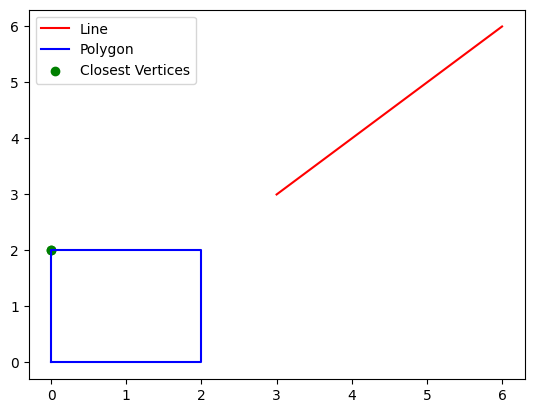

In [29]:
line_coords = [(6, 6), (3, 3)]
poly_coords = [(0, 0), (0, 2), (2, 2), (2, 0)]
intersection, closest_vertex1, closest_vertex2 = find_intersection_and_closest_vertices(line_coords, poly_coords)
print("Toy example:")
print("intersection",intersection)
print("closest_vertex1",closest_vertex1)
print("closest_vertex2",closest_vertex2)

# Plot the line, polygon, and intersection point
plot_line_and_polygon(line_coords, poly_coords, [closest_vertex1, closest_vertex2])

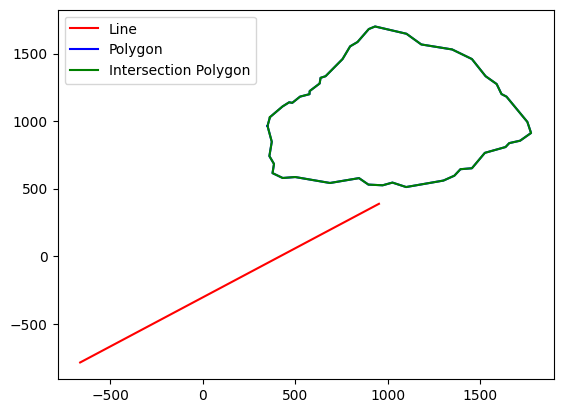

In [21]:
line_coords = [(-664, -786),(953, 388)]
poly_coords = polygon
intersection, closest_vertex1, closest_vertex2 = find_intersection_and_closest_vertices(line_coords, poly_coords)
plot_line_and_polygon(line_coords, poly_coords, intersection)

print()